In [1]:
# loading libraries
import os
import cv2  
import numpy as np

In [2]:
# defining the directory where images are located
image_directory = '/home/hduser/Bananas'

In [3]:
# defining the target image size
target_image_size = (128, 128)

In [4]:
# creating a function to load, resize, normalize, and assign labels to images
def load_resize_normalize_image(image_path, target_size):
    
    image = cv2.imread(os.path.join(image_directory, image_path + '.jpg'))

    # checking if the image was loaded successfully
    if image is None:
        print(f"Failed to load image: {image_path}")
        return None, None

    # resize the image to the target size
    resized_image = cv2.resize(image, target_size)

    # normalising the image by dividing it by 255.0 to scale pixel values to [0, 1]
    normalized_image = resized_image / 255.0

    # assigning labels based on their names
    if image_path.startswith('g'):
        label = 0
    elif image_path.startswith('R'):
        label = 1
    elif image_path.startswith('Y'):
        label = 2
    else:
        label = 99

    return normalized_image, label

# creating lists to store ready images and labels
images = []
labels = []

# looping through image files and preprocess them
for image_filename in os.listdir(image_directory):
    if image_filename.endswith('.jpg'):
        image_path = os.path.splitext(image_filename)[0] 
        normalized_image, label = load_resize_normalize_image(image_path, target_image_size)
        
        if normalized_image is not None and label is not None:
            images.append(normalized_image)
            labels.append(label)

# converting lists to NumPy arrays for further processing
images = np.array(images)
labels = np.array(labels)

# printing the shapes of the loaded images and labels
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

Images shape: (300, 128, 128, 3)
Labels shape: (300,)


In [5]:
labels

array([2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 1, 0,
       1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1,
       2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 1,
       1, 1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2,
       2, 0, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1,
       0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       0, 0, 2, 2, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0])

In [6]:
# splitting the data into 4 shards
num_shards = 4
shard_size = len(images) // num_shards

In [8]:
# Creating lists to store shards images and labels
shards_images = []
shards_labels = []

num_labels = len(np.unique(labels))

shards_label_counts = []  

for i in range(num_shards):
    shard_images = []
    shard_labels = []

    for label in range(num_labels):
        start_idx = i
        end_idx = len(images)
        step = num_shards

        # Extracting a shard of images and labels for the current label
        shard_images.extend(images[labels == label][start_idx:end_idx:step])
        shard_labels.extend(labels[labels == label][start_idx:end_idx:step])

    # Counting the labels in the shard
    unique_labels, label_counts = np.unique(shard_labels, return_counts=True)

    # Appending the shard to the lists
    shards_images.append(np.array(shard_images))
    shards_labels.append(np.array(shard_labels))
    shards_label_counts.append(dict(zip(unique_labels, label_counts)))

# Verifying the sizes and label counts of the shards
for i, shard_images in enumerate(shards_images):
    shard_label_count = shards_label_counts[i]
    print(f"Shard {i + 1}: Images shape: {shard_images.shape}, Labels shape: {shards_labels[i].shape}")
    print(f"Label Counts in Shard {i + 1}: {shard_label_count}")

Shard 1: Images shape: (75, 128, 128, 3), Labels shape: (75,)
Label Counts in Shard 1: {0: 25, 1: 25, 2: 25}
Shard 2: Images shape: (75, 128, 128, 3), Labels shape: (75,)
Label Counts in Shard 2: {0: 25, 1: 25, 2: 25}
Shard 3: Images shape: (75, 128, 128, 3), Labels shape: (75,)
Label Counts in Shard 3: {0: 25, 1: 25, 2: 25}
Shard 4: Images shape: (75, 128, 128, 3), Labels shape: (75,)
Label Counts in Shard 4: {0: 25, 1: 25, 2: 25}


# CNN

In [9]:
# importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import multiprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2023-09-24 14:54:32.623124: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-24 14:54:32.650843: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-24 14:54:32.651339: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-24 14:54:33.203951: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
# defining a CNN model
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax')) 
    return model


In [11]:
# defining a function to train and evaluate the model on a shard
def process_shard(shard_images, shard_labels):
    
    model = cnn_model()
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # training the model on the shard
    model.fit(shard_images, shard_labels, epochs=5, batch_size=32) 
    
    # fvaluating the model on the shard
    loss, accuracy = model.evaluate(shard_images, shard_labels)

    return loss, accuracy

In [12]:
# Define a function to split data into train, validation, and test sets
def split_data(images, labels, test_size=0.2, validation_size=0.2):
    # Split data into train and test sets
    images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=test_size, random_state=42)
    
    # Split train set into train and validation sets
    images_train, images_validation, labels_train, labels_validation = train_test_split(images_train, labels_train, test_size=validation_size, random_state=42)
    
    return images_train, labels_train, images_validation, labels_validation, images_test, labels_test


In [13]:

# Split data into train, validation, and test sets for each shard
shards_train_images, shards_train_labels, shards_validation_images, shards_validation_labels, shards_test_images, shards_test_labels = [], [], [], [], [], []


In [14]:
for i in range(num_shards):
    shard_images_train, shard_labels_train, shard_images_validation, shard_labels_validation, shard_images_test, shard_labels_test = split_data(shards_images[i], shards_labels[i])
    
    shards_train_images.append(shard_images_train)
    shards_train_labels.append(shard_labels_train)
    shards_validation_images.append(shard_images_validation)
    shards_validation_labels.append(shard_labels_validation)
    shards_test_images.append(shard_images_test)
    shards_test_labels.append(shard_labels_test)


In [15]:
# Define a CNN model
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax')) 
    return model


In [16]:
# Define a function to train and evaluate the model
def train_and_evaluate_model(args):
    images_train, labels_train, images_validation, labels_validation, images_test, labels_test = args
    
    model = cnn_model()
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training the model
    history = model.fit(images_train, labels_train, validation_data=(images_validation, labels_validation), epochs=5, batch_size=32, verbose=0)

    # Evaluating the model
    loss, accuracy = model.evaluate(images_test, labels_test)

    return loss, accuracy, history

In [17]:
import time

# Store the start time
start_time = time.time()

# Creating a multiprocessing pool with 4 CPUs
num_cpus = 4
with multiprocessing.Pool(processes=num_cpus) as pool:
    shard_args = [(shards_train_images[i], shards_train_labels[i], shards_validation_images[i], shards_validation_labels[i], shards_test_images[i], shards_test_labels[i]) for i in range(num_shards)]
    shard_results = pool.map(train_and_evaluate_model, shard_args)

# Calculate the total execution time
execution_time = time.time() - start_time
print("Total Execution Time:", execution_time, "seconds")


1/1 [==============================] - 0s 47ms/step - loss: 1.1429 - accuracy: 0.4667
Total Execution Time: 11.045759677886963 seconds


Average Accuracy Across All Shards: 0.5000
Average Loss Across All Shards: 1.1329


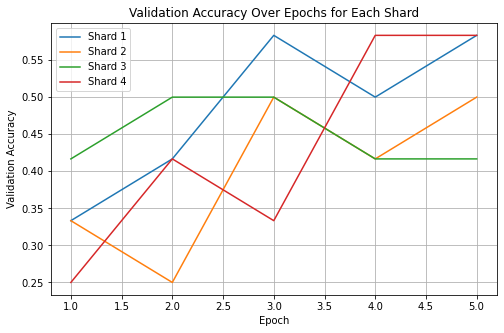

In [18]:
# Calculate the average accuracy and loss for the entire model
average_accuracy = np.mean([shard_accuracy for (_, shard_accuracy, _) in shard_results])
average_loss = np.mean([shard_loss for (shard_loss, _, _) in shard_results])



# Print the average accuracy and loss
print(f"Average Accuracy Across All Shards: {average_accuracy:.4f}")
print(f"Average Loss Across All Shards: {average_loss:.4f}")

# Visualize the accuracy of the entire model
plt.figure(figsize=(8, 5))
for i, (_, _, shard_history) in enumerate(shard_results):
    plt.plot(range(1, 6), shard_history.history['val_accuracy'], label=f'Shard {i + 1}')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Over Epochs for Each Shard')
plt.legend()
plt.grid(True)
plt.show()